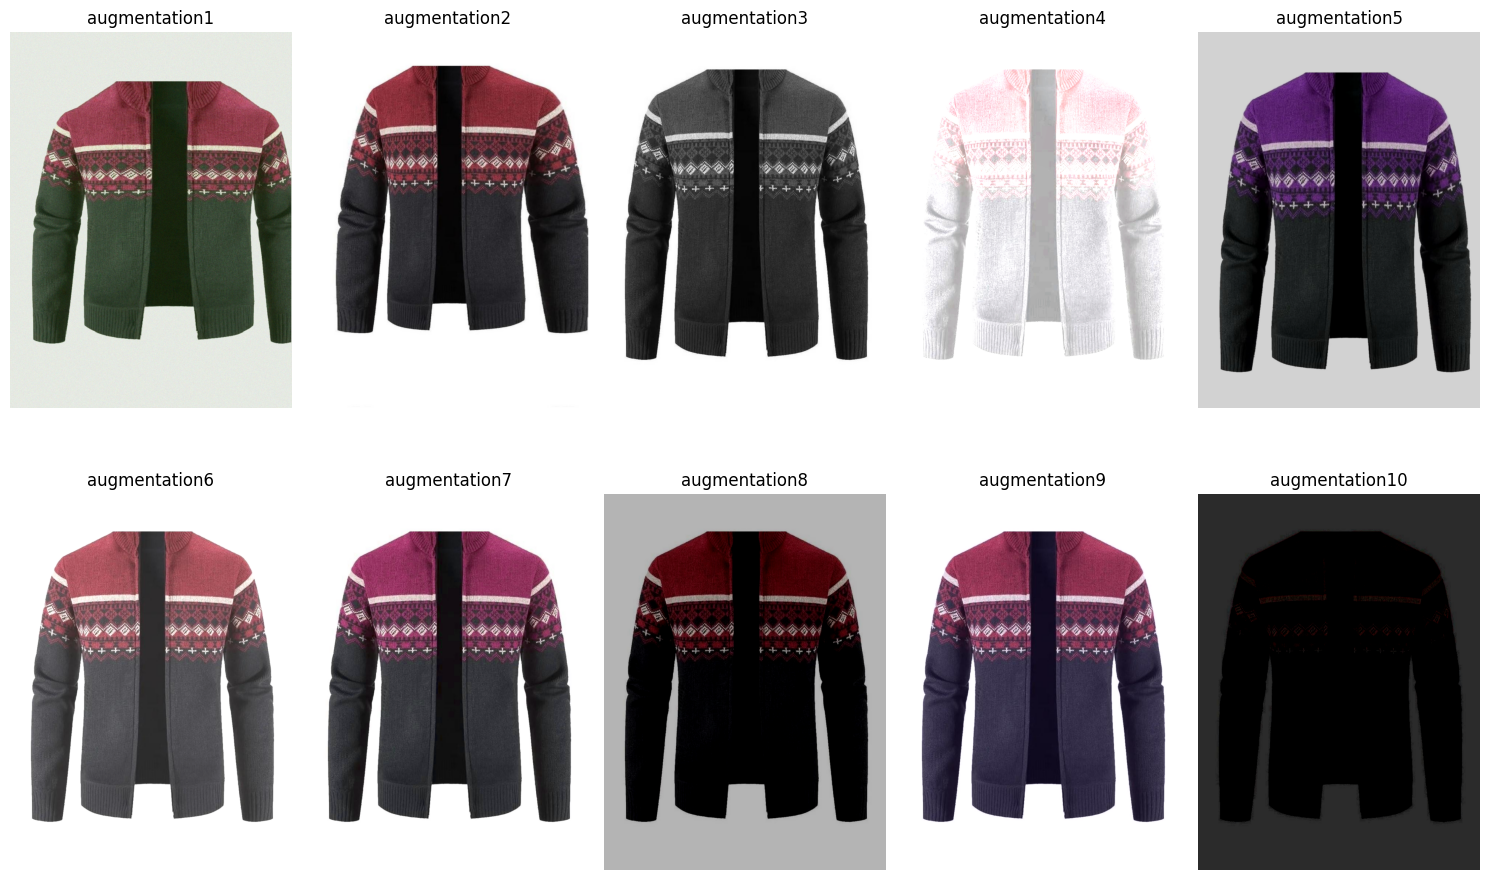

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from albumentations import (
    Compose, GridDistortion, RandomBrightnessContrast, RGBShift, ShiftScaleRotate,
    ColorJitter, GaussNoise,
    HueSaturationValue,
    OpticalDistortion,
    IAASharpen,
    CLAHE,
    ToGray
)
from torchvision.transforms.functional import adjust_brightness, adjust_contrast, adjust_saturation, adjust_hue

# Load the image using PIL
img_path = '/mnt/0d621906-bee7-48c5-af70-5739bc3921b1/UW/SegmAIParser/logs/input/WhatsApp Image 2024-03-27 at 22.19.06.jpeg'
image = Image.open(img_path)
image_np = np.array(image)  # Convert to numpy array

# Define the augmentations
augmentations = {
    "augmentation1": Compose([
        GridDistortion(p=0.5),
        RandomBrightnessContrast(p=0.5),
        RGBShift(p=0.5),
        ColorJitter(p=0.5),
        GaussNoise(p=0.5)
    ]),
    "augmentation2": Compose([
        GridDistortion(p=0.5),
        RandomBrightnessContrast(p=0.5),
        RGBShift(p=0.5),
    ]),
    "augmentation3": Compose([
        ToGray(always_apply=True),
    ]),
    "augmentation4": Compose([
        CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.5),
        RandomBrightnessContrast(brightness_limit=(0.6, 0.8), contrast_limit=0.2, p=0.9),
    ]),
    "augmentation5": Compose([
        GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
        RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),
        ColorJitter(brightness=0.5, p=0.5)
    ]),
    "augmentation6": Compose([
        GaussNoise(var_limit=(20.0, 70.0), p=0.5),
        RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
    ]),
    "augmentation7": Compose([
        HueSaturationValue(hue_shift_limit=20, sat_shift_limit=0, val_shift_limit=-20, p=0.5),
        RandomBrightnessContrast(brightness_limit=-0.3, contrast_limit=0.3, p=0.5),
        GaussNoise(var_limit=(10.0, 30.0), p=0.5)
    ]),
    "augmentation8": Compose([
        OpticalDistortion(distort_limit=0.05, shift_limit=0.05, p=0.5),
        RandomBrightnessContrast(brightness_limit=-0.4, contrast_limit=0.4, p=0.5),
        ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.5)
    ]),
    "augmentation9": Compose([
        IAASharpen(alpha=(0.1, 0.3), lightness=(0.5, 1.0), p=0.5),
        RandomBrightnessContrast(brightness_limit=-0.5, contrast_limit=0.5, p=0.5),
        RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.5)
    ]),
    "augmentation10": Compose([
        CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=0.5),
        RandomBrightnessContrast(brightness_limit=(-0.7, -0.9), contrast_limit=0.4, p=0.9),
        ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2, p=0.5)
    ])
}

# Apply each augmentation and store the resulting images
augmented_images = {}

for name, aug in augmentations.items():
    augmented_images[name] = aug(image=image_np)['image']

# Display the augmented images
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()

for i, (name, img) in enumerate(augmented_images.items()):
    axes[i].imshow(img)
    axes[i].set_title(name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
